<a href="https://colab.research.google.com/github/roman-mikhaylov/repo_sinergiya/blob/main/less_7_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import scipy
import scipy.stats as sps

**работа с распределениями**

In [110]:
# нормальное распределение
X = sps.norm

In [111]:
'''
X(params).rvs(size = N) генерация выборки размера 10. возвращает np.array,
params это мю(середина - медиана) и сигма(среднеквадтичное отклонение) (loc = 0, scale = 1)
rvs()- функция создания массива размером с size
'''
X.rvs(size = 10)

array([ 1.71690267,  0.94195728,  0.52330223,  1.1676762 , -0.25079303,
        0.63294126, -0.55006936,  0.37288889, -0.98953633,  1.59165305])

In [112]:
'''
X(params).cdf(x) значение функции распределения в точке x
'''
X.cdf(0)

0.5

In [113]:
'''
значение логарифма функции распределения в точке x
'''
X.logcdf(0)

-0.6931471805599453

In [114]:
'''
q- квантиль - 0,5 - реальная медиана
'''
X(loc = 0).ppf(0.5)

0.0

In [115]:
'''
X(prams).median() - медиана (0,5 квантиль) "мю"
'''
X.median()

0.0

In [116]:
'''
матожидание
'''
X.mean()

0.0

In [117]:
'''
дисперсия -  среднеквадратичное отклонение 'сигма' в квадрате
'''
X.var()

1.0

**нормальное распределение**

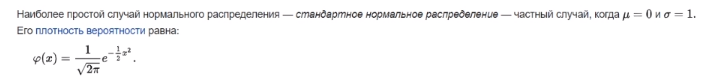


  
'мю" - математическое ожидание( среднее)
'сигма' - среднее квадратичное отклонение

In [118]:
sample = sps.norm(loc = 1, scale = 3).rvs(size=200) # loc - сдвиг по оси X, 'сигма' - scale
print('первые 10 значений выборки:\n', sample[:10])
print('выборочное среднее:%.3f'% sample.mean())
print('выборочное дисперсия:%.3f'% sample.var())

первые 10 значений выборки:
 [-1.18750931  2.53798441 -6.08418521  1.09026676 -0.08528579  3.45385095
 -0.74146689 -2.06538275  3.20841895  5.97344589]
выборочное среднее:0.864
выборочное дисперсия:9.730


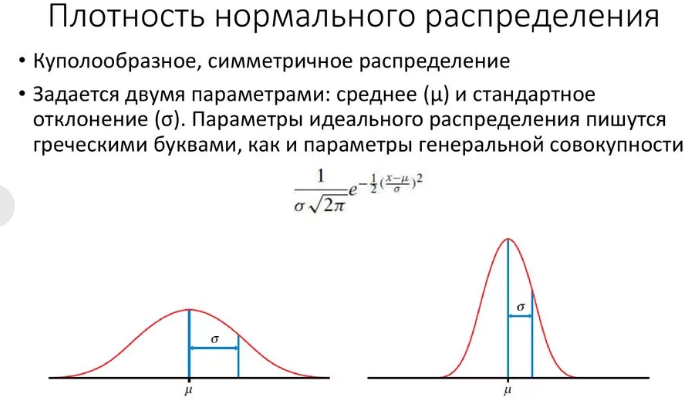

In [119]:
print('плотность распределения:\t\t', sps.norm(loc = 1, scale = 3).pdf([-1,0,1,2,3]))
print('функция распределения:\t', sps.norm(loc = 1, scale = 3).cdf([-1,0,1,2,3]))
print('квантили:', sps.norm(loc = 1, scale = 3).ppf([0.05,0.1,0.5,0.9,0.95]))

плотность распределения:		 [0.10648267 0.12579441 0.13298076 0.12579441 0.10648267]
функция распределения:	 [0.25249254 0.36944134 0.5        0.63055866 0.74750746]
квантили: [-3.93456088 -2.8446547   1.          4.8446547   5.93456088]


In [120]:
import matplotlib.pyplot as plt
import numpy as np

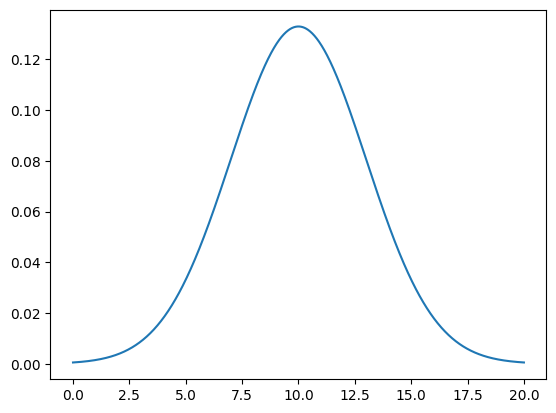

In [121]:
x= np.linspace(0,20,1000)
y= sps.norm(loc = 10, scale = 3).pdf(x)
plt.plot(x,y)

**биномиальное распределение**

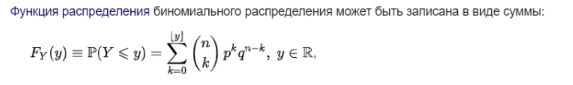

In [122]:
sample = sps.binom(n=10, p = 0.5).rvs(size=100)
print('первые 10 значений выборки:\n', sample[:10])
print('выборочное среднее:%.3f'% sample.mean())
print('выборочное дисперсия:%.3f'% sample.var())

первые 10 значений выборки:
 [4 6 7 4 2 5 3 4 4 7]
выборочное среднее:5.200
выборочное дисперсия:2.800


In [123]:
print('плотность распределения:\t\t', sps.binom(n=10, p = 0.5).pmf([-1,0,1,2,3])) # дискретное распределение
print('функция распределения:\t', sps.binom(n=10, p = 0.5).cdf([-1,0,1,2,3]))
print('квантили:', sps.binom(n=10, p = 0.5).ppf([0.05,0.1,0.5,0.9,0.95]))

плотность распределения:		 [0.         0.00097656 0.00976563 0.04394531 0.1171875 ]
функция распределения:	 [0.         0.00097656 0.01074219 0.0546875  0.171875  ]
квантили: [2. 3. 5. 7. 8.]


**многомерное нормальное распределение**

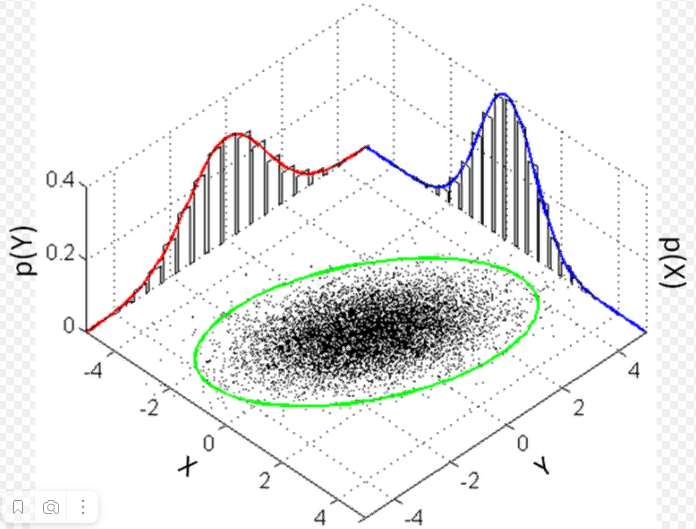

In [124]:
sample  = sps.multivariate_normal(mean=[1,1], cov=[[2,1],[1,2]]).rvs(size =200)

print('первые 10 значений выборки:\n', sample[:10])
print('выборочное среднее:%.3f', sample.mean(axis = 0))
print('выборочная матрица ковариаций:', np.cov(sample.T))

первые 10 значений выборки:
 [[ 0.4850537   0.12214668]
 [ 0.49488261 -0.50504117]
 [-1.36078633  0.35221195]
 [ 1.18841412  0.09045004]
 [ 3.2779671   2.11374817]
 [ 0.78531303 -1.23581621]
 [ 1.5435424   2.01252515]
 [ 2.77779415  1.8854872 ]
 [-0.6803821   0.08339959]
 [ 0.16448428  0.49749051]]
выборочное среднее:%.3f [1.07389086 1.05079364]
выборочная матрица ковариаций: [[1.85048506 1.01530355]
 [1.01530355 2.23710719]]


**собственное распределение**

для этого необходимо создать класс, который будет наследоваться от rv_continuonus для непрерывных случайных величин и от класса rv_discrete для дискрентых сучайных величин

In [125]:
class cubic_gen(sps.rv_continuous):
  def _pdf(self, x):
    return   4*x**3/15
cubic = cubic_gen(a=1, b=2, name = 'cubic')

sample = cubic.rvs(size = 200)
print('первые 10 значений выборки:\n', sample[:10])
print('выборочное среднее:%.3f', sample.mean())
print('выборочная дисперсия:', sample.var())


первые 10 значений выборки:
 [1.82610885 1.77565584 1.71914111 1.82175674 1.69285645 1.1044832
 1.7626396  1.40887561 1.9789498  1.82362197]
выборочное среднее:%.3f 1.6392093975328619
выборочная дисперсия: 0.06495558782235505


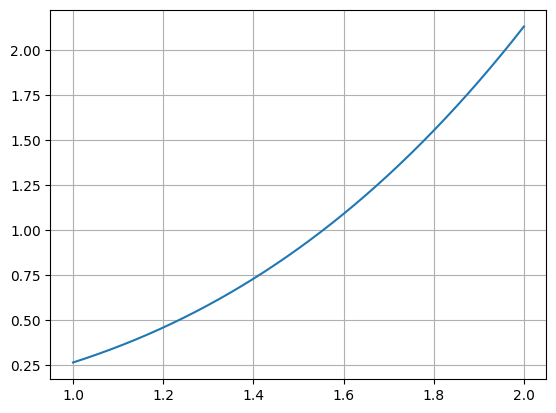

In [126]:
plt.grid()
plt.plot(np.linspace(1,2,1000), cubic.pdf(np.linspace(1,2,1000)))

**линейная регрессия**

предсказать доход магазина к концу осени по данным за весь год

In [127]:
import pandas as pd

In [128]:
sales = pd.read_csv('sales_train.csv')
#sales59 = sales[sales.shop_id == 59]
#sales59.date = pd.to_datetime(sales59.date)
#sales59.set_index('date', inplace = True)
sales.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [129]:
sales59 = sales[sales.shop_id == 59]
sales59.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
40084,10.01.2013,0,59,22151,399.0,1.0
77502,04.01.2013,0,59,5603,699.0,1.0
77503,19.01.2013,0,59,5587,199.0,2.0
77504,31.01.2013,0,59,5613,5571.0,1.0


In [130]:
sales59.date = pd.to_datetime(sales59.date)

<ipython-input-130-1b4d12b8c03b>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales59.date = pd.to_datetime(sales59.date)
<ipython-input-130-1b4d12b8c03b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales59.date = pd.to_datetime(sales59.date)


In [131]:
sales59.set_index('date', inplace = True) # индексируем по 'date'

In [132]:
sales59 = sales59.drop(columns=['date_block_num','item_id'])
sales59.head()

,shop_id,item_price,item_cnt_day
date,,,
2013-02-01,59,999.0,1.0
2013-10-01,59,399.0,1.0
2013-04-01,59,699.0,1.0
2013-01-19,59,199.0,2.0
2013-01-31,59,5571.0,1.0


In [133]:
sales59['income'] = sales59['item_price'] * sales59['item_cnt_day']
sales59.head()

,shop_id,item_price,item_cnt_day,income
date,,,,
2013-02-01,59,999.0,1.0,999.0
2013-10-01,59,399.0,1.0,399.0
2013-04-01,59,699.0,1.0,699.0
2013-01-19,59,199.0,2.0,398.0
2013-01-31,59,5571.0,1.0,5571.0


In [134]:
sales_59 = sales59[sales59.index.year == 2013] # берем год 2013 - не сработало
sales59.head()

,shop_id,item_price,item_cnt_day,income
date,,,,
2013-02-01,59,999.0,1.0,999.0
2013-10-01,59,399.0,1.0,399.0
2013-04-01,59,699.0,1.0,699.0
2013-01-19,59,199.0,2.0,398.0
2013-01-31,59,5571.0,1.0,5571.0


In [135]:
sales_59 = sales59[sales59.index.month < 11] # отсекаем 11 мес
sales59.head(100)

,shop_id,item_price,item_cnt_day,income
date,,,,
2013-02-01,59,999.0,1.0,999.0
2013-10-01,59,399.0,1.0,399.0
2013-04-01,59,699.0,1.0,699.0
2013-01-19,59,199.0,2.0,398.0
2013-01-31,59,5571.0,1.0,5571.0
...,...,...,...,...
2013-06-01,59,349.0,1.0,349.0
2013-01-25,59,349.0,1.0,349.0
2013-01-31,59,349.0,1.0,349.0


In [136]:
sales_59 = sales59[sales59.index.month < 11]

In [137]:
sales_59_historic = sales59[sales59.index.month < 10]
sales_59_historic

,shop_id,item_price,item_cnt_day,income
date,,,,
2013-02-01,59,999.0,1.0,999.0
2013-04-01,59,699.0,1.0,699.0
2013-01-19,59,199.0,2.0,398.0
2013-01-31,59,5571.0,1.0,5571.0
2013-01-14,59,699.0,1.0,699.0
...,...,...,...,...
2015-05-10,59,99.0,1.0,99.0
2015-08-10,59,1399.0,1.0,1399.0
2015-01-10,59,999.0,1.0,999.0


In [138]:
sales_59_predict = sales59[sales59.index.month == 10]
sales_59_predict

,shop_id,item_price,item_cnt_day,income
date,,,,
2013-10-01,59,399.0,1.0,399.0
2013-10-01,59,699.0,1.0,699.0
2013-10-01,59,2390.0,1.0,2390.0
2013-10-01,59,1499.0,1.0,1499.0
2013-10-01,59,999.0,1.0,999.0
...,...,...,...,...
2015-10-18,59,1799.0,1.0,1799.0
2015-10-14,59,6398.0,1.0,6398.0
2015-10-10,59,298.0,1.0,298.0


In [139]:
sales_59_historic = sales_59_historic.sort_values(by = 'date')
sales_59_to_predict = sales_59_predict.sort_values(by = 'date')
sales_59_historic['INC'] = sales_59_historic.income.cumsum()

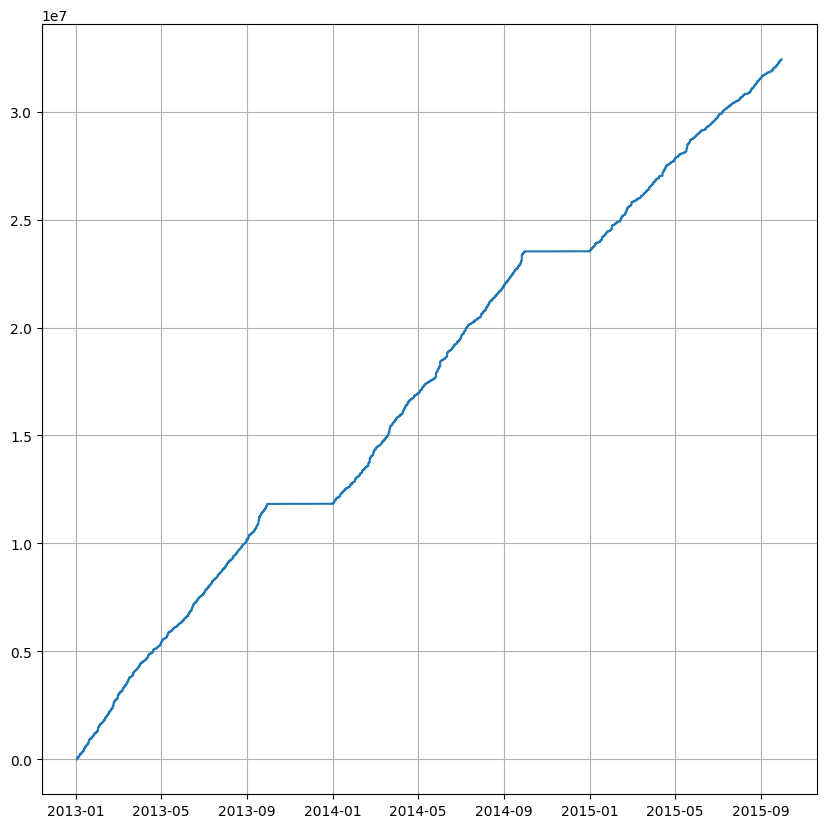

In [140]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(sales_59_historic.index, sales_59_historic.INC)

ValueError: ignored

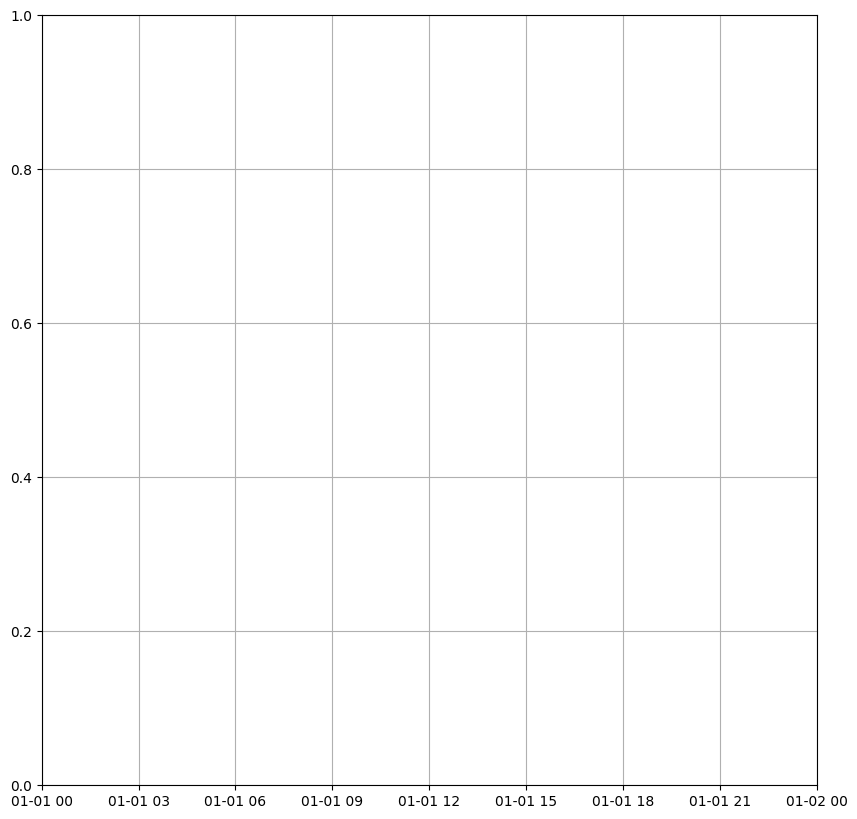

In [156]:
plt.figure(figsize=(10,10))
plt.grid()
plt.scatter(sales_59_historic.index.unique(), sales_59_historic.INC.resample('1D').agg('last')) # не работатет

In [151]:
result = scipy.stats.linregress(x=np.arange(272), y = sales_59_historic.INC.resample('2D').agg('last'))

ValueError: ignored